In [ ]:
import math as m
import matplotlib.pyplot as plt
%matplotlib notebook
from collections import OrderedDict 


#ordering  from the dtw logs
handle=OrderedDict()
with open("1") as a:
    handle=a.readlines()
handle=[i.strip("\n") for i in handle]


#ordering from sam alignment
with open("l2.sam") as l:
    line=l.readlines()
line=[i.strip("\n") for i in line]
line=[i.split(" ") for i in line]
idx=[i[0].split("|")[0] for i in line]
fr=OrderedDict()
for i in range(len(line)):
    fr[idx[i]]=int(int(line[i][1])==0)




#dtw log
with open("ls1") as l:
    line=l.readlines()
line=[i.strip("\n") for i in line]
line=[i.split(",") for i in line]
line=[float(i[0].rsplit("@",1)[1]) for i in line]
scores_f=[]
j=0


for i in handle:
    if fr[i]==1:
        scores_f.append(line[j])
    j+=1
    if j==len(line):
        break


with open("ls1r") as l:
    line=l.readlines()
line=[i.strip("\n") for i in line]
line=[i.split(",") for i in line]
line=[float(i[0].rsplit("@",1)[1]) for i in line]


scores_r=[]
j=0
for i in handle:
    if fr[i]==0:
        scores_r.append(line[j])
    j+=1
    if j==len(line):
        break   





l_f={}
l_r={}
for i in range(len(scores_f)):
   

        if(m.floor(scores_f[i]/10000) not in l_f):
            l_f[m.floor(scores_f[i]/10000)]=1
        else:
            l_f[m.floor(scores_f[i]/10000)]+=1
            
for i in range(len(scores_r)):
        if(m.floor(scores_r[i]/10000) not in l_r):
            l_r[m.floor(scores_r[i]/10000)]=1
        else:
            l_r[m.floor(scores_r[i]/10000)]+=1
sum1=0
for i in l_f.values():
    sum1+=i
for i in l_f.keys():
    l_f[i]=l_f[i]/sum1
sum1=0
for i in l_r.values():
    sum1+=i
for i in l_r.keys():
    l_r[i]=l_r[i]/sum1
    
    
     

with open("hs1") as l:
    line=l.readlines()
line=[i.strip("\n") for i in line]
line=[i.split(",") for i in line]
line=[float(i[0].rsplit("@",1)[1]) for i in line]
scores=line


h={}

for i in range(len(scores)):
        if(m.floor(scores[i]/10000) not in h):
            h[m.floor(scores[i]/10000)]=1
        else:
            h[m.floor(scores[i]/10000)]+=1
sum1=0
for i in h.values():
    sum1+=i
for i in h.keys():
    h[i]=h[i]/sum1
    
print(h)   
l_f=OrderedDict(sorted(l_f.items())) 
l_r=OrderedDict(sorted(l_r.items())) 
h=OrderedDict(sorted(h.items())) 
plt.plot(list(l_f.keys()),list(l_f.values())[0:1000],label='lambda-forward, rds=535')
plt.plot(list(l_r.keys()),list(l_r.values())[0:1000],label='lambda-reverse, rds=203')
plt.plot(list(h.keys()),list(h.values())[0:1000],label='human, rds=2257')
plt.xlabel('floor[dtw alignment score/10k]')
plt.ylabel('Probability')
plt.legend()
plt.show()

In [ ]:
print(handle)

In [ ]:
from tslearn.metrics import dtw_subsequence_path
%matplotlib notebook
from scipy import stats

#reading fwd ref
with open("fwd_genome2sig") as f:
    fwd_ref=f.readlines()
fwd_ref=[i.strip("\n") for i in fwd_ref] 
fwd_ref=[float(i) for i in fwd_ref]
fwd_ref=stats.zscore(fwd_ref)


#reading rev ref
with open("rev_genome2sig") as f:
    rev_ref=f.readlines()
rev_ref=[i.strip("\n") for i in rev_ref] 
rev_ref=[float(i) for i in rev_ref]
rev_ref=stats.zscore(rev_ref)



    
#reading in fwd strand squiggles
with open("fwd_log") as f:
    c_f=f.readlines()
c_f=[i.strip("\n") for i in c_f] 
c_f=[i.strip("@") for i in c_f] 

c_f=[i for i in c_f if i[0][0]!='>']
c_f=[i.split(",")[0:3000] for i in c_f]



for i in range(len(c_f)):
    for j in range(3000):
        c_f[i][j]=float(c_f[i][j])
c_f=[stats.zscore(i) for i in c_f]
c_fdist=[]
for i in c_f:
    p, d = dtw_subsequence_path(i, fwd_ref)
    c_fdist.append(d)
print("Completed fwd covid reads")


#reading in reverse strand squiggles
with open("rev_log") as f:
    c_r=f.readlines()
c_r=[i.strip("\n") for i in c_r] 
c_r=[i.strip("@") for i in c_r] 

c_r=[i for i in c_r if i[0][0]!='>']
c_r=[i.split(",")[0:3000] for i in c_r]


for i in range(len(c_r)):
    for j in range(3000):
        c_r[i][j]=float(c_r[i][j])
c_r=[stats.zscore(i) for i in c_r]
c_rdist=[]
for i in c_r:
    p, d = dtw_subsequence_path(i, rev_ref)
    c_rdist.append(d)
print("Completed reverse covid reads")

#reading in human squiggles
with open("human_log") as f:
    h=f.readlines()
h=[i.strip("\n") for i in h] 
h=[i.strip("@") for i in h] 

h=[i for i in h if i[0][0]!='>']
h=[i.split(",")[0:3000] for i in h]


for i in range(len(h)):
    for j in range(3000):
        h[i][j]=float(h[i][j])
h=[stats.zscore(i) for i in h]
h_fdist=[]
h_rdist=[]
for i in h:
    p, d = dtw_subsequence_path(i, fwd_ref)
    h_fdist.append(d)
    p, d = dtw_subsequence_path(i, rev_ref)
    h_rdist.append(d)
print("Completed human reads")


In [ ]:
import pickle
pickle.dump(c_fdist,open("c_fdist.p","wb"))
pickle.dump(c_rdist,open("c_rdist.p","wb"))
pickle.dump(h_fdist,open("h_fdist.p","wb"))
pickle.dump(h_rdist,open("h_rdist.p","wb"))

<IPython.core.display.Javascript object>


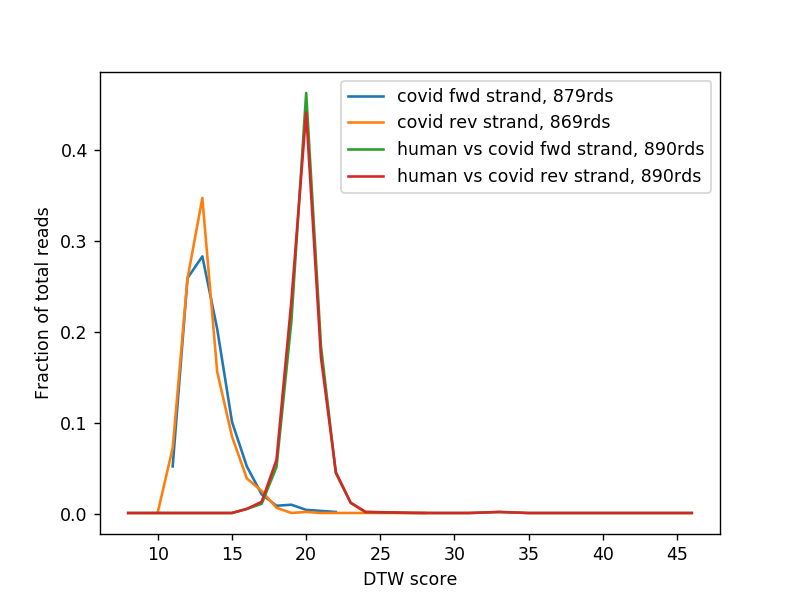

In [41]:
import matplotlib.pyplot as plt
%matplotlib notebook
import pickle
import seaborn as sns
from collections import OrderedDict 
import math as m
c_fdist = pickle.load( open( "c_fdist.p", "rb" ) )
c_rdist = pickle.load( open( "c_rdist.p", "rb" ) )
h_fdist = pickle.load( open( "h_fdist.p", "rb" ) )
h_rdist = pickle.load( open( "h_rdist.p", "rb" ) )

# cf=sum(c_fdist)
# for i in range(len(c_fdist)):
#     c_fdist[i]=c_fdist[i]/cf
# cr=sum(c_rdist)
# for i in range(len(c_rdist)):
#     c_rdist[i]=c_rdist[i]/cf
# hf=sum(h_fdist)
# for i in range(len(h_fdist)):
#     h_fdist[i]=h_fdist[i]/cf
# hr=sum(h_rdist)
# for i in range(len(h_rdist)):
#     h_rdist[i]=h_rdist[i]/cf

cf=OrderedDict()
cr=OrderedDict()
hf=OrderedDict()
hr=OrderedDict()
for i in range(len(c_fdist)):
        c_fdist[i]=m.floor(c_fdist[i])
        if(c_fdist[i] not in cf):
            cf[c_fdist[i]]=1
        else:
            cf[c_fdist[i]]+=1
for i in range(len(c_rdist)):
        c_rdist[i]=m.floor(c_rdist[i])
        if(c_rdist[i] not in cr):
            cr[c_rdist[i]]=1
        else:
            cr[c_rdist[i]]+=1
for i in range(len(h_rdist)):
        h_rdist[i]=m.floor(h_rdist[i])
        if(h_rdist[i] not in hr):
            hr[h_rdist[i]]=1
        else:
            hr[h_rdist[i]]+=1
for i in range(len(h_fdist)):
        h_fdist[i]=m.floor(h_fdist[i])
        if(h_fdist[i] not in hf):
            hf[h_fdist[i]]=1
        else:
            hf[h_fdist[i]]+=1
cf=OrderedDict(sorted(cf.items()))
cr=OrderedDict(sorted(cr.items()))
hf=OrderedDict(sorted(hf.items()))
hr=OrderedDict(sorted(hr.items()))



tmp=sum(cf.values())
for i in cf.keys():
    cf[i]=cf[i]/tmp
tmp=sum(cr.values())
for i in cr.keys():
    cr[i]=cr[i]/tmp
tmp=sum(hf.values())
for i in hf.keys():
    hf[i]=hf[i]/tmp
tmp=sum(hr.values())
for i in hr.keys():
    hr[i]=hr[i]/tmp


plt.plot(list(cf.keys()),list(cf.values()),label='covid fwd strand, 879rds')
plt.plot(list(cr.keys()),list(cr.values()),label='covid rev strand, 869rds')
plt.plot(list(hf.keys()),list(hf.values()),label='human vs covid fwd strand, 890rds')
plt.plot(list(hr.keys()),list(hr.values()),label='human vs covid rev strand, 890rds')
plt.xlabel('DTW score')
plt.ylabel('Fraction of total reads')
plt.legend()
plt.show()


In [73]:
#Plot cost matrix
import matplotlib.pyplot as plt
%matplotlib notebook
import pickle
import seaborn as sns
from tslearn.metrics import subsequence_cost_matrix
import numpy as np
from tslearn.utils import to_time_series
from tslearn.metrics import dtw_subsequence_path
# #reading fwd ref
# with open("fwd_genome2sig") as f:
#     fwd_ref=f.readlines()
# fwd_ref=[i.strip("\n") for i in fwd_ref] 
# fwd_ref=[float(i) for i in fwd_ref]
# fwd_ref=stats.zscore(fwd_ref)

# #reading in human squiggles
# with open("human_log") as f:
#     h=f.readlines()
# h=[i.strip("\n") for i in h] 
# h=[i.strip("@") for i in h] 

# h=[i for i in h if i[0][0]!='>']
# h=[i.split(",")[0:3000] for i in h]


# for i in range(len(h)):
#     for j in range(3000):
#         h[i][j]=float(h[i][j])
# h=[stats.zscore(i) for i in h]
# h_fdist=[]
# h_rdist=[]

# for i in [h[0]]:
#     t=subsequence_cost_matrix(to_time_series(i),to_time_series(fwd_ref))




[[6878.25757738 2207.88499945 2148.689796   ...  426.51864445
   426.73905586  426.95946727]
 [6878.25879694 2209.49730679 2151.79604811 ...  426.6698367
   426.89024811  427.11065952]]


<IPython.core.display.Javascript object>


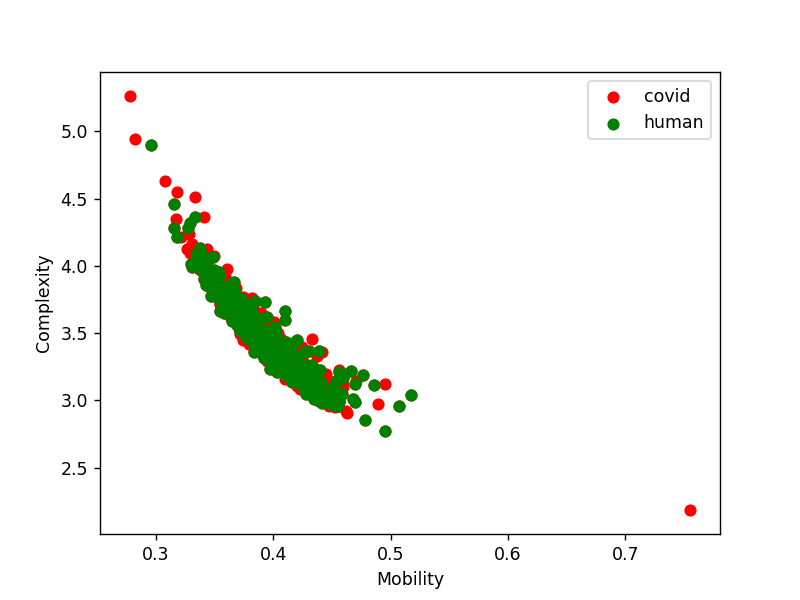

In [53]:
#check rawmap with covid vs human

import matplotlib.pyplot as plt
%matplotlib notebook
import pickle
import seaborn as sns
from collections import OrderedDict 
import math as m
import numpy as np
from scipy import stats
#reading in fwd strand squiggles

# def mobility(v):
#     return (1.0*np.var(np.diff(v))/np.var(v))**0.5
    
# def calc_hjorth(x):
#     #x=(x-np.mean(x))/np.std(x)
#     dx=np.diff(x)
#     ddx=np.diff(dx)
#     A=np.var(x)
#     M=mobility(x)
#     C=1.0*mobility(dx)/M
    
#     return A,M,C

# with open("fwd_log") as f:
#     c_f=f.readlines()
# c_f=[i.strip("\n") for i in c_f] 
# c_f=[i.strip("@") for i in c_f] 

# c_f=[i for i in c_f if i[0][0]!='>']
# c_f=[i.split(",")[0:3000] for i in c_f]



# for i in range(len(c_f)):
#     for j in range(3000):
#         c_f[i][j]=float(c_f[i][j])
# c_f=[stats.zscore(i) for i in c_f]

# #reading in reverse strand squiggles
# with open("rev_log") as f:
#     c_r=f.readlines()
# c_r=[i.strip("\n") for i in c_r] 
# c_r=[i.strip("@") for i in c_r] 

# c_r=[i for i in c_r if i[0][0]!='>']
# c_r=[i.split(",")[0:3000] for i in c_r]


# for i in range(len(c_r)):
#     for j in range(3000):
#         c_r[i][j]=float(c_r[i][j])
# c_r=[stats.zscore(i) for i in c_r]


# #reading in human squiggles
# with open("human_log") as f:
#     h=f.readlines()
# h=[i.strip("\n") for i in h] 
# h=[i.strip("@") for i in h] 

# h=[i for i in h if i[0][0]!='>']
# h=[i.split(",")[0:3000] for i in h]


# for i in range(len(h)):
#     for j in range(3000):
#         h[i][j]=float(h[i][j])
# h=[stats.zscore(i) for i in h]

# C1=[calc_hjorth(i) for i in c_f]
# C2=[calc_hjorth(i) for i in c_r]
# H=[calc_hjorth(i) for i in c_f]


plt.scatter([i[1] for i in C1],[i[2] for i in C1],c='r',label='covid')
plt.scatter([i[1] for i in C2],[i[2] for i in C2],c='r')
plt.scatter([i[1] for i in H],[i[2] for i in H],c='g',label='human')
plt.xlabel('Mobility')
plt.ylabel('Complexity')
plt.legend()
plt.show()

In [74]:

print(len(fwd_ref))

29890
